# Titanic Survival Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [4]:
data.shape

(889, 12)

In [5]:
data.pop('Cabin')

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
884     NaN
885     B42
886     NaN
887    C148
888     NaN
Name: Cabin, Length: 889, dtype: object

In [6]:
data.shape

(889, 11)

In [7]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Dropping Unimportant Columns
PassengerId doesn't provide any information about the survival.

Name and Ticket is no where related to Survival.

In [8]:
data.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.7+ KB


# Converting Object type Columns to Int

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [12]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


# EDA
I feel to do it with whole new data

In [13]:
data_new=pd.read_csv('train.csv')

In [14]:
data_new.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Catplot

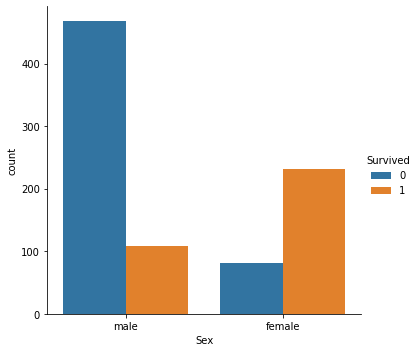

In [15]:
sns.catplot(x ="Sex", hue ="Survived", kind ="count", data = data_new)

# Inference
By seeing the graph assuming that survival rate of male is 30% and female is 70%.

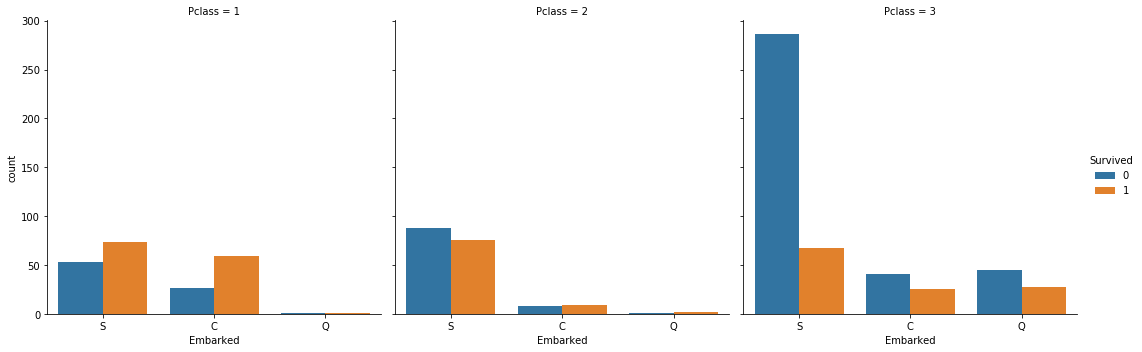

In [16]:
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data =data_new)

# Heatmap

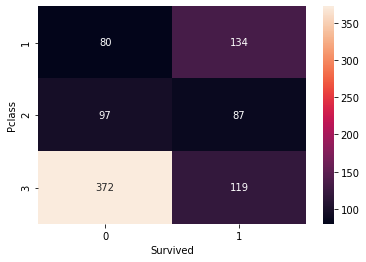

In [17]:
data_group = data_new.groupby(['Pclass', 'Survived']) 
S_pclass = data_group.size().unstack() 
sns.heatmap(S_pclass, annot = True, fmt ="d")

# Inference
By observing the heatmap we can assume that Class 1 passengers have more survival rate than Class 2 & 3.

# Naive Bayes

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import * 
from sklearn.metrics import accuracy_score, confusion_matrix

# Training, Predicting Accuracy, Confusion Matrix

Classification of Records with the help of probability is called Naive Bayes and is applicable only for categorical values.

In [20]:
def naivebayes(column):
    
    nb = BernoulliNB()

    for i in column:
        x_log = data.drop([i], axis=1)
        print("--------------------------------------------------------------------------------------")
        print(f"Dependent Variable :{i} & Others are Independent Variables")
        print("x :\n", x_log.head())
        y_log = data[i]
        print("\ny:\n", y_log.head())
    
        x_train, x_test, y_train, y_test = train_test_split(x_log, y_log, test_size =0.3, random_state=0)
        model = nb.fit(x_train,y_train)
        pred = model.predict(x_test)
    
        print(f"\nAcuuracy of {i}: ", accuracy_score(y_test, pred, normalize=True))
        print(f"Confusion matrix of {i}: \n", confusion_matrix(y_test, pred))

column_names = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked']        
naivebayes(column_names)

--------------------------------------------------------------------------------------
Dependent Variable :Survived & Others are Independent Variables
x :
    Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    1  22.0      1      0   7.2500         2
1       1    0  38.0      1      0  71.2833         0
2       3    0  26.0      0      0   7.9250         2
3       1    0  35.0      1      0  53.1000         2
4       3    1  35.0      0      0   8.0500         2

y:
 0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

Acuuracy of Survived:  0.7715355805243446
Confusion matrix of Survived: 
 [[131  26]
 [ 35  75]]
--------------------------------------------------------------------------------------
Dependent Variable :Pclass & Others are Independent Variables
x :
    Survived  Sex   Age  SibSp  Parch     Fare  Embarked
0         0    1  22.0      1      0   7.2500         2
1         1    0  38.0      1      0  71.2833         0
2         1    0  26.0      0  

In [22]:
score = {'Dependent Variable': ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch','Embarked'],
         'Accuracy Score': [0.7715,0.5917,0.7453,0.6891,0.7153,0.7340],
         'Total ':[267,267,267,267,267,267],
         'Correct Prediction':[206,158,199,184,191,196],
         'Incorrect Prediction':[61,109,68,83,76,71]}
score = pd.DataFrame(score)
score

,Dependent Variable,Accuracy Score,Total,Correct Prediction,Incorrect Prediction
0,Survived,0.7715,267,206,61
1,Pclass,0.5917,267,158,109
2,Sex,0.7453,267,199,68
3,SibSp,0.6891,267,184,83
4,Parch,0.7153,267,191,76
5,Embarked,0.7340,267,196,71
